In [ ]:
pip install tensorflow scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, concatenate, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import plot_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [ ]:
df = pd.read_csv('mlp_data_preprocessed.csv')

In [ ]:
print("NaN values in df", df.isnull().sum())

NaN values in df loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
int_rate               0
installment            0
                      ..
emp_length_6 years     1
emp_length_7 years     1
emp_length_8 years     1
emp_length_9 years     1
emp_length_< 1 year    1
Length: 153, dtype: int64


In [ ]:
#if null values
df = df.dropna()

In [ ]:
# Split the data into features and target
X = df.drop('good_bad', axis=1)
y = df['good_bad']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# using StandardScaler for numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Deep Neural Network**

In [ ]:
#Build the DNN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5787/5787 [==============================] - 21s 3ms/step - loss: 0.2804 - accuracy: 0.8985 - val_loss: 0.2869 - val_accuracy: 0.8943
Epoch 2/10
5787/5787 [==============================] - 18s 3ms/step - loss: 0.2672 - accuracy: 0.8988 - val_loss: 0.2787 - val_accuracy: 0.8935
Epoch 3/10
5787/5787 [==============================] - 18s 3ms/step - loss: 0.2630 - accuracy: 0.8993 - val_loss: 0.2799 - val_accuracy: 0.8939
Epoch 4/10
5787/5787 [==============================] - 19s 3ms/step - loss: 0.2599 - accuracy: 0.8995 - val_loss: 0.2767 - val_accuracy: 0.8942
Epoch 5/10
5787/5787 [==============================] - 18s 3ms/step - loss: 0.2571 - accuracy: 0.9001 - val_loss: 0.2773 - val_accuracy: 0.8942
Epoch 6/10
5787/5787 [==============================] - 19s 3ms/step - loss: 0.2548 - accuracy: 0.9004 - val_loss: 0.2796 - val_accuracy: 0.8938
Epoch 7/10
5787/5787 [==============================] - 20s 4ms/step - loss: 0.2518 - accuracy: 0.9010 - val_loss: 0.2812 - val_ac

In [ ]:
#Evaluate the model on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

1809/1809 [==============================] - 3s 2ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy of DNN: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Accuracy of DNN: 0.8971

Classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.07      0.12      5920
         1.0       0.90      0.99      0.95     51944

    accuracy                           0.90     57864
   macro avg       0.69      0.53      0.53     57864
weighted avg       0.86      0.90      0.86     57864



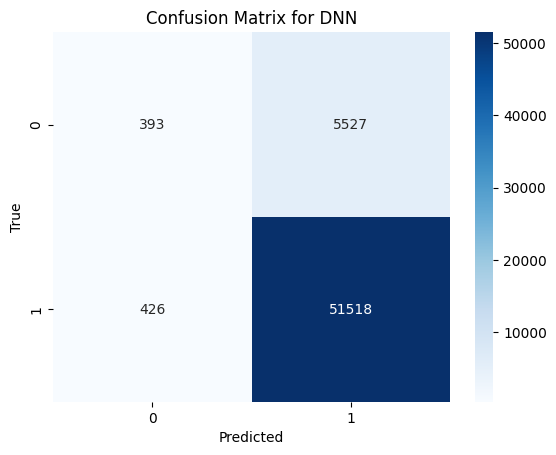

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for DNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Multilayer Perceptron**

In [ ]:
# Define the MLP model architecture
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5787/5787 [==============================] - 22s 3ms/step - loss: 0.3052 - accuracy: 0.8961 - val_loss: 0.2832 - val_accuracy: 0.8929
Epoch 2/10
5787/5787 [==============================] - 30s 5ms/step - loss: 0.2794 - accuracy: 0.8981 - val_loss: 0.2807 - val_accuracy: 0.8932
Epoch 3/10
5787/5787 [==============================] - 31s 5ms/step - loss: 0.2754 - accuracy: 0.8981 - val_loss: 0.2796 - val_accuracy: 0.8932
Epoch 4/10
5787/5787 [==============================] - 21s 4ms/step - loss: 0.2735 - accuracy: 0.8982 - val_loss: 0.2800 - val_accuracy: 0.8934
Epoch 5/10
5787/5787 [==============================] - 35s 6ms/step - loss: 0.2723 - accuracy: 0.8984 - val_loss: 0.2796 - val_accuracy: 0.8929
Epoch 6/10
5787/5787 [==============================] - 19s 3ms/step - loss: 0.2717 - accuracy: 0.8982 - val_loss: 0.2779 - val_accuracy: 0.8931
Epoch 7/10
5787/5787 [==============================] - 19s 3ms/step - loss: 0.2708 - accuracy: 0.8985 - val_loss: 0.2766 - val_ac

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)

1809/1809 [==============================] - 6s 3ms/step - loss: 0.2671 - accuracy: 0.8982


In [ ]:
# Generate predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32").flatten()

1809/1809 [==============================] - 3s 2ms/step


In [ ]:
# Print the accuracy
print(f"Test Accuracy: {accuracy}")
# Print the classification report
print(classification_report(y_test, y_pred))

Test Accuracy: 0.898175060749054
              precision    recall  f1-score   support

         0.0       0.62      0.01      0.02      5920
         1.0       0.90      1.00      0.95     51944

    accuracy                           0.90     57864
   macro avg       0.76      0.51      0.48     57864
weighted avg       0.87      0.90      0.85     57864



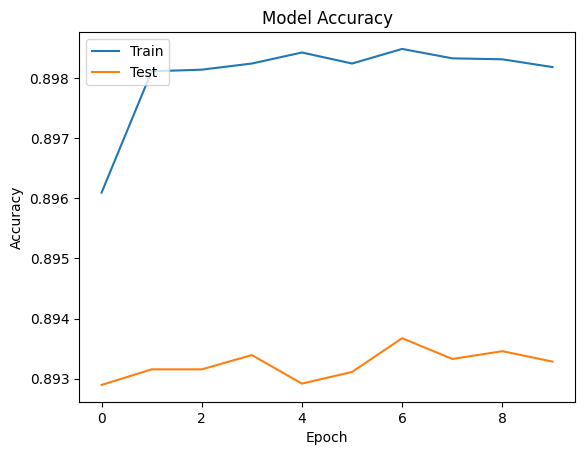

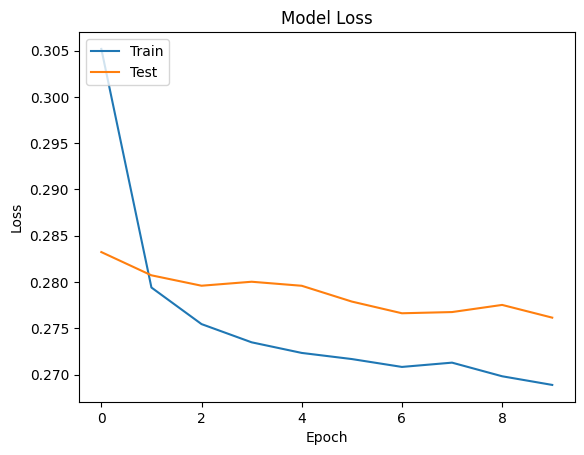

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1809/1809 [==============================] - 5s 3ms/step


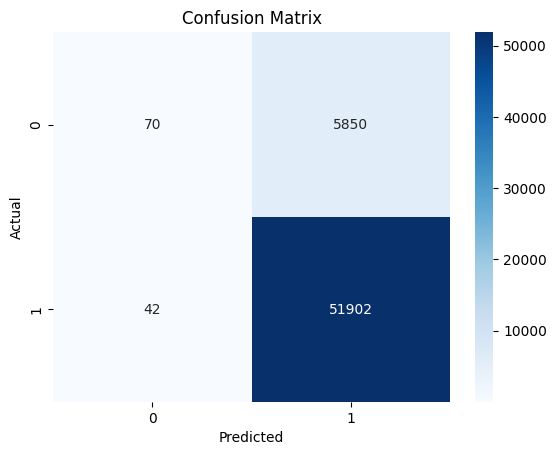

In [ ]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32").flatten()
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

1809/1809 [==============================] - 3s 2ms/step


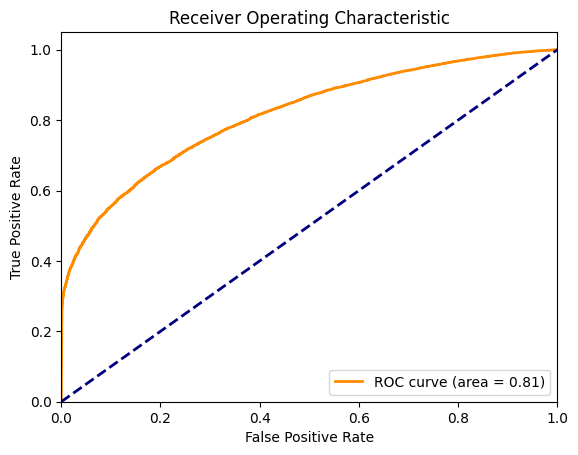

In [ ]:
#Compute ROC curve and ROC area
y_pred_prob = model.predict(X_test_scaled).flatten()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Deep and Wide Model**

In [ ]:
# Define the deep component
deep_input = Input(shape=(X_train_scaled.shape[1],))
deep_model = Dense(256, activation='relu')(deep_input)
deep_model = Dense(128, activation='relu')(deep_model)
deep_model = Dense(64, activation='relu')(deep_model)

In [ ]:
# Define the wide component
wide_input = Input(shape=(X_train_scaled.shape[1],))
wide_model = Dense(64, activation='linear')(wide_input)

In [ ]:
# Combine deep and wide components
combined = concatenate([deep_model, wide_model])
final_model_output = Dense(1, activation='relu')(combined)

In [ ]:
# Create the final model
model = Model(inputs=[deep_input, wide_input], outputs=final_model_output)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit([X_train_scaled, X_train_scaled], y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5787/5787 [==============================] - 28s 5ms/step - loss: 1.5616 - accuracy: 0.8972 - val_loss: 1.6336 - val_accuracy: 0.8929
Epoch 2/10
5787/5787 [==============================] - 27s 5ms/step - loss: 1.5568 - accuracy: 0.8978 - val_loss: 1.6336 - val_accuracy: 0.8929
Epoch 3/10
5787/5787 [==============================] - 27s 5ms/step - loss: 1.5545 - accuracy: 0.8981 - val_loss: 1.6336 - val_accuracy: 0.8929
Epoch 4/10
5787/5787 [==============================] - 27s 5ms/step - loss: 1.5545 - accuracy: 0.8981 - val_loss: 1.6336 - val_accuracy: 0.8929
Epoch 5/10
5787/5787 [==============================] - 26s 4ms/step - loss: 1.5545 - accuracy: 0.8981 - val_loss: 1.6336 - val_accuracy: 0.8929
Epoch 6/10
5787/5787 [==============================] - 25s 4ms/step - loss: 1.5545 - accuracy: 0.8981 - val_loss: 1.6336 - val_accuracy: 0.8929
Epoch 7/10
5787/5787 [==============================] - 27s 5ms/step - loss: 1.5545 - accuracy: 0.8981 - val_loss: 1.6336 - val_ac

In [ ]:
model.evaluate([X_test_scaled, X_test_scaled], y_test)

1809/1809 [==============================] - 4s 2ms/step - loss: 1.5601 - accuracy: 0.8977


[1.5601444244384766, 0.8976911306381226]

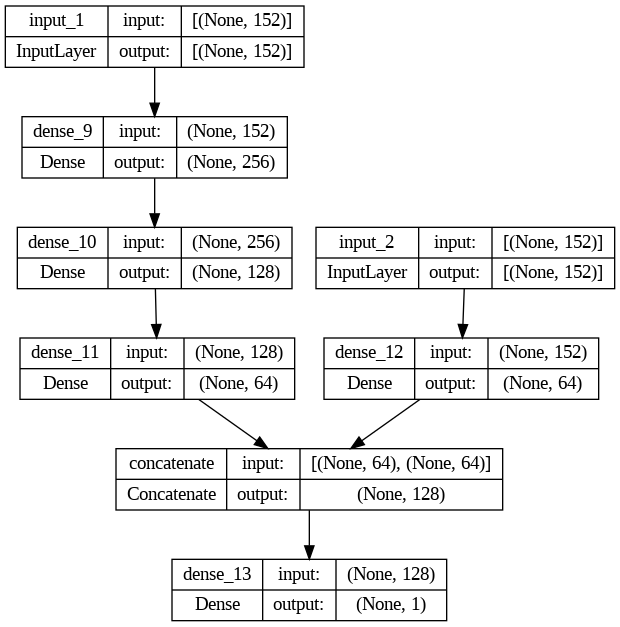

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Combine deep and wide components
combined = concatenate([deep_model, wide_model])

# Final model output with sigmoid activation for binary classification
final_model_output = Dense(1, activation='sigmoid')(combined)

# Create the final model
model = Model(inputs=[deep_input, wide_input], outputs=final_model_output)

# Compile the model with binary_crossentropy loss for a binary classification problem
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit([X_train_scaled, X_train_scaled], y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5787/5787 [==============================] - 31s 5ms/step - loss: 0.2866 - accuracy: 0.8968 - val_loss: 0.2883 - val_accuracy: 0.8931
Epoch 2/10
5787/5787 [==============================] - 26s 4ms/step - loss: 0.2695 - accuracy: 0.8987 - val_loss: 0.2790 - val_accuracy: 0.8934
Epoch 3/10
5787/5787 [==============================] - 24s 4ms/step - loss: 0.2647 - accuracy: 0.8989 - val_loss: 0.2811 - val_accuracy: 0.8939
Epoch 4/10
5787/5787 [==============================] - 25s 4ms/step - loss: 0.2609 - accuracy: 0.8997 - val_loss: 0.2818 - val_accuracy: 0.8930
Epoch 5/10
5787/5787 [==============================] - 26s 4ms/step - loss: 0.2579 - accuracy: 0.9003 - val_loss: 0.2781 - val_accuracy: 0.8938
Epoch 6/10
5787/5787 [==============================] - 26s 4ms/step - loss: 0.2546 - accuracy: 0.9011 - val_loss: 0.2798 - val_accuracy: 0.8931
Epoch 7/10
5787/5787 [==============================] - 24s 4ms/step - loss: 0.2507 - accuracy: 0.9021 - val_loss: 0.2833 - val_ac

In [ ]:
model.evaluate([X_test_scaled, X_test_scaled], y_test)

1809/1809 [==============================] - 5s 3ms/step - loss: 0.2902 - accuracy: 0.8946


[0.2902407646179199, 0.8945631384849548]

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_importances = pd.DataFrame({'feature': range(X_train.shape[1]), 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)


     feature    importance
15        15  8.642632e-02
3          3  4.758581e-02
6          6  4.543503e-02
20        20  4.516608e-02
11        11  4.490742e-02
..       ...           ...
114      114  1.571572e-05
99        99  3.103827e-07
66        66  0.000000e+00
75        75  0.000000e+00
107      107  0.000000e+00

[152 rows x 2 columns]


In [ ]:
print(feature_importances.head(10))

    feature  importance
15       15    0.086426
3         3    0.047586
6         6    0.045435
20       20    0.045166
11       11    0.044907
12       12    0.044432
23       23    0.044259
21       21    0.044003
5         5    0.042316
4         4    0.040625


In [ ]:
predictions = model.predict([X_test_scaled, X_test_scaled])

1809/1809 [==============================] - 4s 2ms/step


In [ ]:
print("Sample Predictions:", predictions[:10])

Sample Predictions: [[0.9761937 ]
 [0.9999984 ]
 [0.94682115]
 [0.96709895]
 [0.9999624 ]
 [0.9975211 ]
 [0.8353213 ]
 [0.95507705]
 [0.89581364]
 [0.9999965 ]]


In [ ]:
# For binary classification with sigmoid output
binary_predictions = (predictions > 0.5).astype(int)

In [ ]:
print("Sample Binary Predictions:", binary_predictions[:10])

Sample Binary Predictions: [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
roc_auc = roc_auc_score(y_test, predictions)

In [ ]:
# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.8945631135075349
Precision: 0.9049663433508242
Recall: 0.9861004158324349
F1 Score: 0.9437928969551799
ROC-AUC: 0.7897373675678797
